In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

In [2]:
preprocessed_glcm_path = r"D:\MED_LEAF_ID\data\glcm"
glcm_features_csv = r"D:\MED_LEAF_ID\data\glcm"

In [ ]:
DISTANCES = [1, 2, 3]  
ANGLES = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  
GLCM_PROPS = ["contrast", "dissimilarity", "homogeneity", "energy", "correlation", "ASM"]


In [ ]:
def compute_glcm_features(image):
    features = {}
    
    glcm = graycomatrix(
        image, distances=DISTANCES, angles=ANGLES, levels=256, symmetric=True, normed=True
    )
    for prop in GLCM_PROPS:
        prop_values = graycoprops(glcm, prop)
        features[prop] = np.mean(prop_values)
    return features


In [ ]:
def process_class_images(class_path, class_name, source_label):
    data = []
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            features = compute_glcm_features(image)
            features["class"] = class_name
            features["image_name"] = image_file
            features["source"] = source_label  
            data.append(features)
        else:
            print(f"Error loading image: {image_path}")
    return data


In [ ]:
def extract_glcm_features(dataset_path):
    all_data = []
    for folder_name in ["Augmented", "Original"]:
        folder_path = os.path.join(dataset_path, folder_name)
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue
        print(f"Processing folder: {folder_name}")
        for class_folder in os.listdir(folder_path):
            class_path = os.path.join(folder_path, class_folder)
            if os.path.isdir(class_path):
                print(f"Processing class: {class_folder}")
                class_data = process_class_images(class_path, class_folder, folder_name)
                all_data.extend(class_data)
    df = pd.DataFrame(all_data)
    return df


In [9]:
if __name__ == "__main__":
    print("Extracting GLCM features from preprocessed data...")
    glcm_features_df = extract_glcm_features(preprocessed_glcm_path)
    print(f"Saving GLCM features to {glcm_features_csv}...")
    glcm_features_df.to_csv(glcm_features_csv, index=False)
    print("GLCM feature extraction complete!")

Extracting GLCM features from preprocessed data...
Processing folder: Augmented
Processing class: Balloon_Vine
Processing class: Drumstick
Processing class: Kambajala
Processing class: Kasambruga
Processing class: Lemongrass
Processing class: Malabar_Nut
Processing class: Pea
Processing class: Raddish
Processing class: Seethaashoka
Processing class: Turmeric
Processing folder: Original
Processing class: Aloevera
Processing class: Amla
Processing class: Amruthaballi
Processing class: Arali
Processing class: ashoka
Processing class: Ashwagandha
Processing class: Astma_weed
Processing class: Avacado
Processing class: Badipala
Processing class: Balloon_Vine
Processing class: Bamboo
Processing class: Basale
Processing class: Beans
Processing class: Betel
Processing class: Betel_Nut
Processing class: Brahmi
Processing class: Bringaraja
Processing class: camphor
Processing class: Caricature
Processing class: Castor
Processing class: Catharanthus
Processing class: Chakte
Processing class: Chil

PermissionError: [Errno 13] Permission denied: 'D:\\MED_LEAF_ID\\data\\glcm'

In [ ]:
import pandas as pd

glcm_features_csv = r"D:\MED_LEAF_ID\data\glcm_features_df.csv"
df = pd.read_csv(glcm_features_csv)

print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())


Data Overview:
      contrast  dissimilarity  homogeneity    energy  correlation       ASM  \
0  1030.285880      21.474815     0.082454  0.010463     0.794228  0.000112   
1   204.363919      10.628424     0.104538  0.018021     0.801126  0.000328   
2    60.859976       4.588322     0.252179  0.051901     0.927789  0.002704   
3    53.947286       5.206539     0.208035  0.031345     0.910598  0.000994   
4   122.770769       7.475224     0.193598  0.037097     0.950500  0.001382   

          class       image_name     source  
0  Balloon_Vine   aug__0_100.png  Augmented  
1  Balloon_Vine  aug__0_1009.png  Augmented  
2  Balloon_Vine  aug__0_1013.png  Augmented  
3  Balloon_Vine  aug__0_1026.png  Augmented  
4  Balloon_Vine  aug__0_1028.png  Augmented  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18617 entries, 0 to 18616
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   contrast       18617 

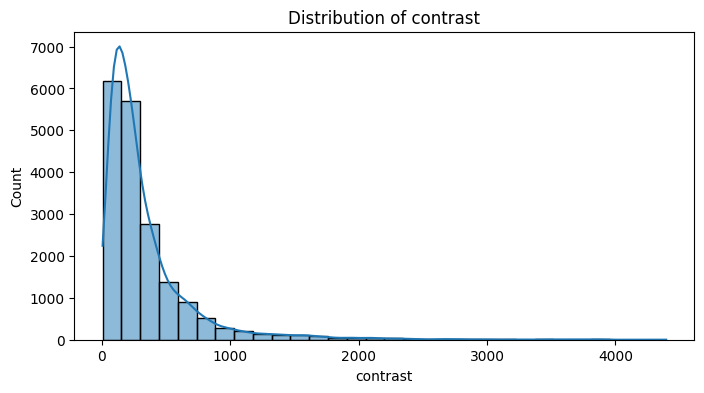

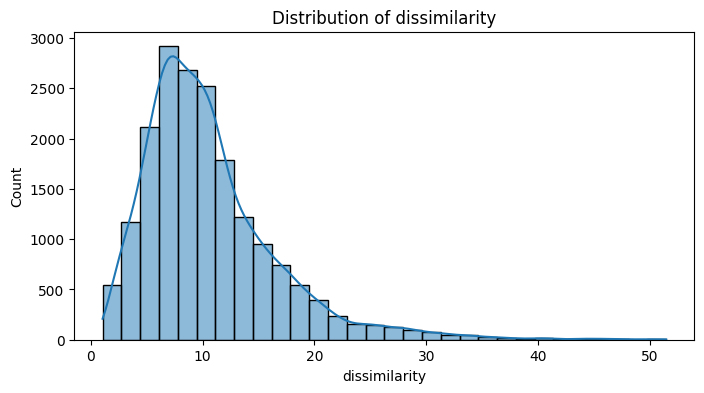

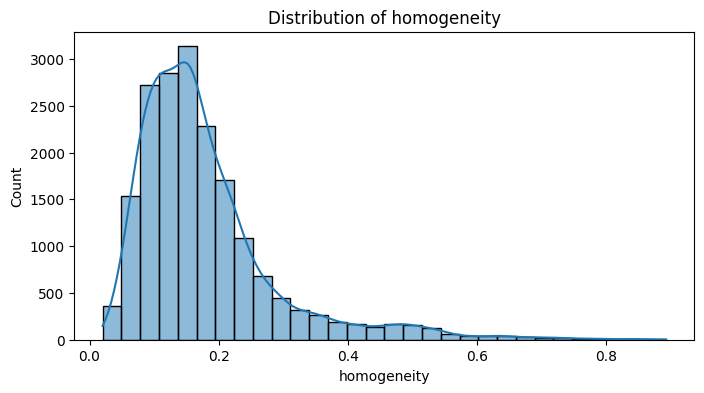

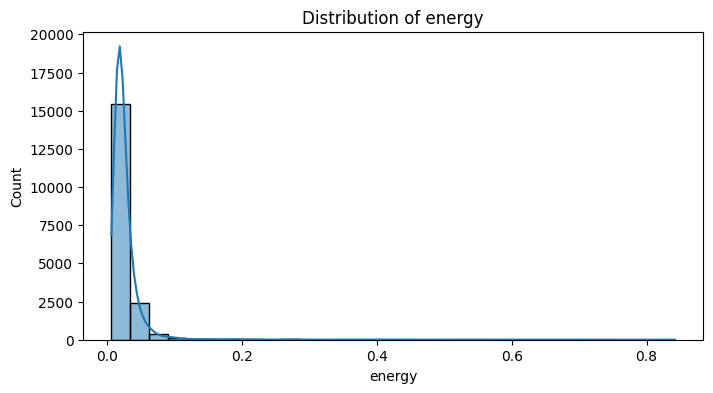

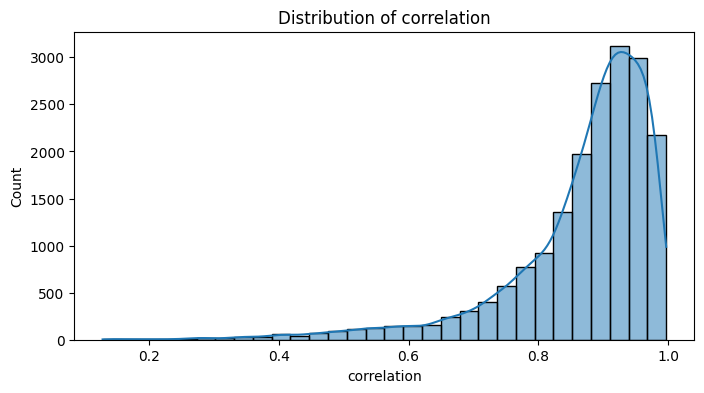

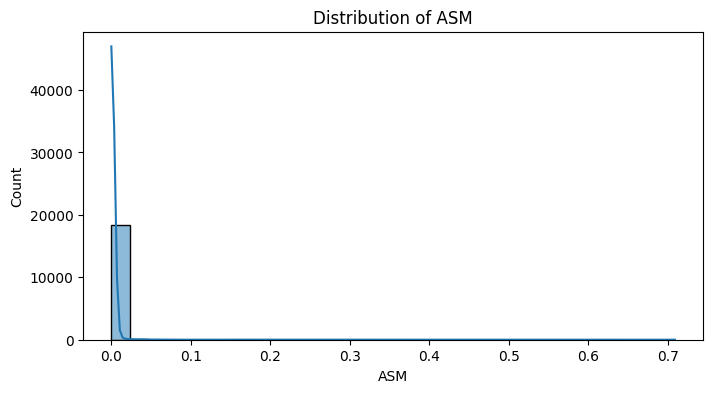

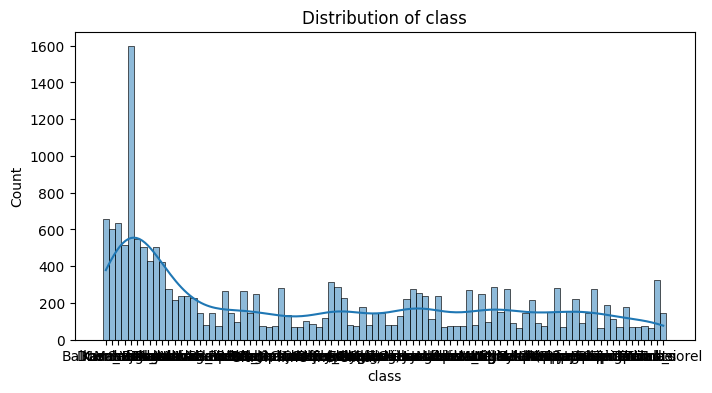

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns[:-2]  
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


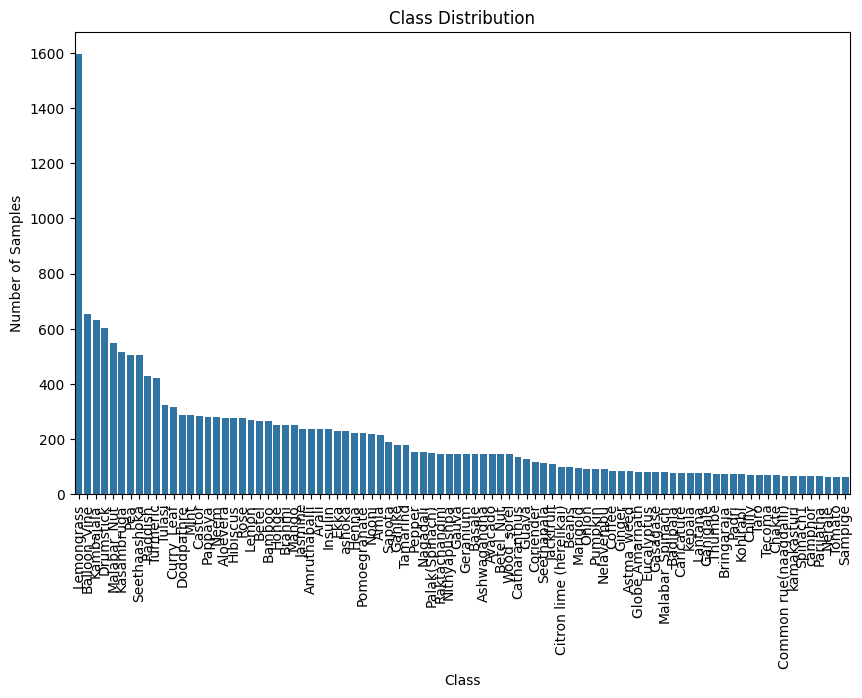

In [12]:
class_counts = df['class'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


ValueError: could not convert string to float: 'Balloon_Vine'

<Figure size 1000x800 with 0 Axes>